In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import tree


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Step1:  Load the dataset
df = pd.read_csv(r'C:\Users\bouwa\Desktop\Anis Bwz\Learning\DSI\Team Project\archive\heart.csv')

# Display the first few rows of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [53]:
#Step 2: Perform data exploratory analysis:

# Check the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Get summary statistics
print("Summary statistics:")
print(df.describe().round(2))

# Check data types of each column
print("Data types:")
print(df.dtypes)

Shape of the dataset: (918, 12)
Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Summary statistics:
          Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak  \
count  918.00     918.00       918.00     918.00  918.00   918.00   
mean    53.51     132.40       198.80       0.23  136.81     0.89   
std      9.43      18.51       109.38       0.42   25.46     1.07   
min     28.00       0.00         0.00       0.00   60.00    -2.60   
25%     47.00     120.00       173.25       0.00  120.00     0.00   
50%     54.00     130.00       223.00       0.00  138.00     0.60   
75%     60.00     140.00       267.00       0.00  156.00     1.50   
max     77.00     200.00       603.00       1.00  202.00     6.20   

       HeartDisease  
count        918.00 

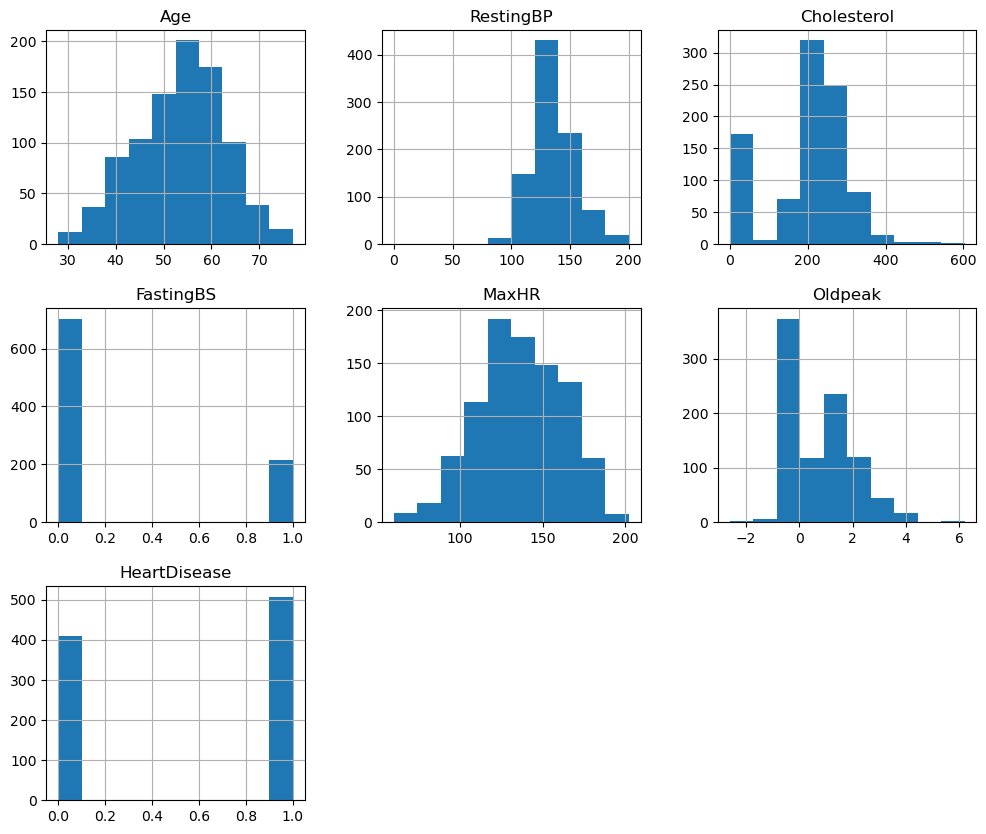

In [54]:
# Exploratory data visualization to better understand the distribution of  features in the heart failure dataset
df.hist(figsize=(12, 10))
plt.show()



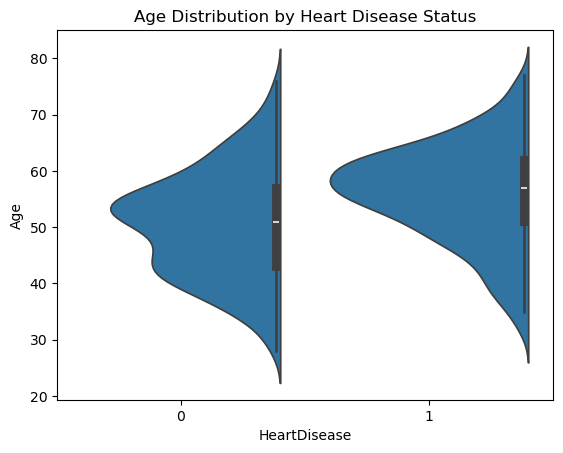

In [55]:
sns.violinplot(data=df, x='HeartDisease', y='Age', split=True)
plt.title('Age Distribution by Heart Disease Status')
plt.show()

In [56]:
#Step two : 
    #Ensured the data is preprocessed and ready to be used in my  decision tree model by encoding the cateogircal features and scaling the numerical features 

In [57]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Display the first few rows after encoding
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [58]:

from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR', 'Oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [59]:
print(df.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.832432   
1 -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.105664   
2 -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.832432   
3 -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.574711   
4  0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.832432   

   HeartDisease  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0             0   True               True              False   
1             1  False              False               True   
2             0   True               True              False   
3             1  False              False              False   
4             0   True              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
0             False               True          False             False   
1             False               True      

In [60]:

#Split the data into training and testing sets:

from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A Decision Tree is a supervised machine learning algorithm that makes predictions by learning simple decision rules inferred from the data. Here's an example of how it works :

        The tree splits the data at each node based on a feature (e.g., Cholesterol, Age) that best separates the classes (HeartDisease=0 or HeartDisease=1). 
        The split is chosen to maximize information gain 

In [61]:
# Step 3: Train the Decision Tree Model

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
#Step 4. Evaluate the Model : Evaluate the model's performance on the test set using metrics like accuracy, precision, recall, F1-score, and AUC-ROC.

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC-ROC Score
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        77
           1       0.86      0.85      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Confusion Matrix:
[[62 15]
 [16 91]]
AUC-ROC Score: 0.8278310474572157


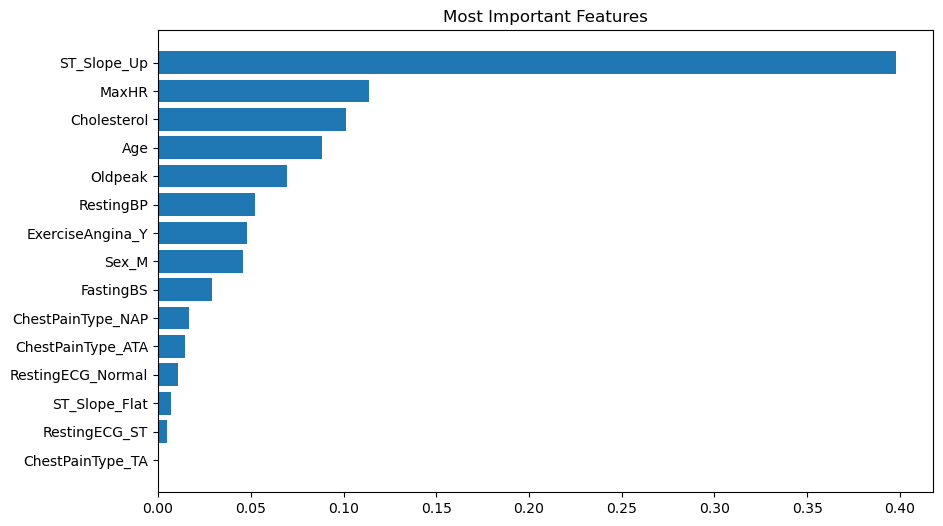

In [63]:
##features the tree relied on most to make decisions
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values("Importance", ascending=True)

plt.figure(figsize=(10,6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.title("Most Important Features")
plt.show()

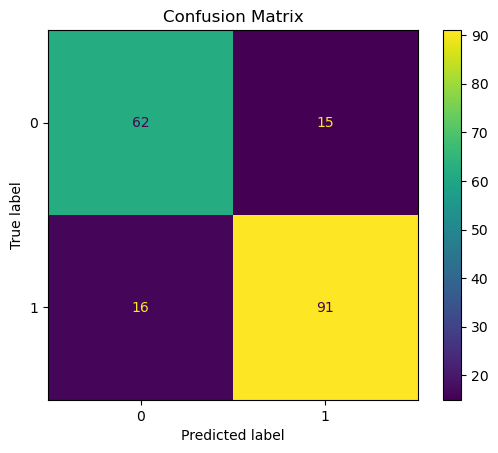

In [64]:
##Visualize correct vs. incorrect predictions (Confusion Matrix).

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

Key Findings: 

        True Positives (TP): 91 patients with heart disease were correctly identified.
        False Positives (FP): 15 patients without heart disease were wrongly flagged.
        True Negatives (TN): 62 patients without heart disease were correctly identified.
        False Negatives (FN): 16 patients with heart disease were missed.

Step 6: Tune Hyperparameters: 
                
        To minimize the risk of overfitting we used GridSearchCV  to find the best hyperparameters.


In [71]:
# Define hyperparameters to tune

param_grid = {
    'max_depth': [3, 5, 10, None],      # Test different depths (None = no limit)
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples at leaf nodes
    'criterion': ['gini', 'entropy']    # Splitting criterion
}

In [72]:


# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,                          # 5-fold cross-validation
    scoring='recall',               # Prioritize minimizing false negatives
    n_jobs=-1                       
)
# Fit the model

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [73]:
# Evaluate the best model
# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_dt_model = grid_search.best_estimator_

# Evaluate on test set
y_pred_best = best_dt_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



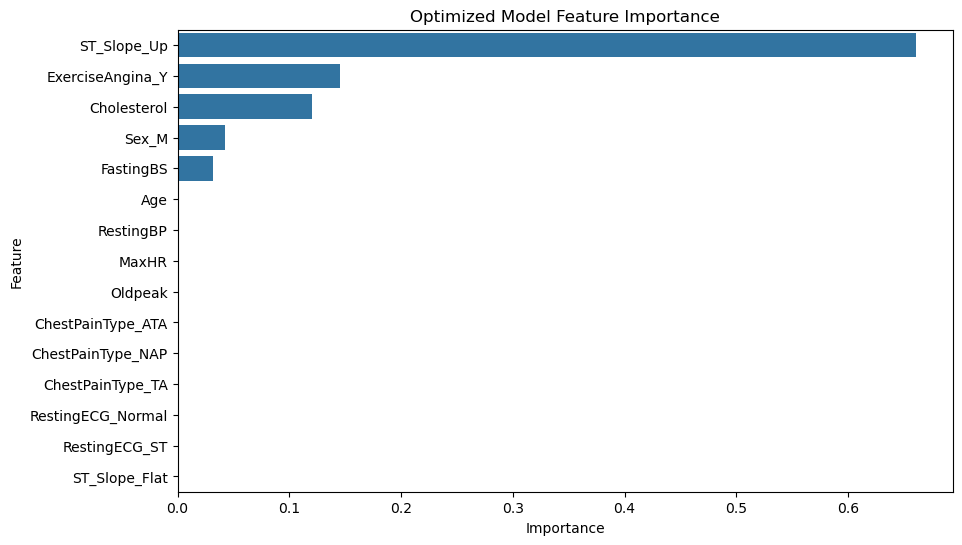

In [74]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_dt_model.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Optimized Model Feature Importance")
plt.show()

#Step 5: Key Results 

    After tuning, the model’s performance improved:
        Accuracy increased from 83% to 85%
        Class 0 Recall increased from 81% to 87%
        Class 1 Precision increased from 86% to	90% 

#Key Improvements:
    
    Reduced False Negatives: Recall for class 0 (No Heart Disease) increased from 81% to 87%, meaning fewer healthy patients are misclassified as having heart disease.
    Higher Precision for Heart Disease: Precision for class 1 (Heart Disease) improved from 86% to 90%, indicating fewer false alarms

# Summary 
    The decision Tree model performs well (85% accuracy) and effectively identifies heart disease cases.